<a href="https://colab.research.google.com/github/AkshadPawar/oibsip_taskno_4/blob/main/Level_1_(4)_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data Analist intership/Twitter_Data.csv')

# Display the first few rows of the dataset
df.head()

# Get basic info about the dataset
df.info()

# Check for any missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,0
clean_text,4
category,7


In [ ]:
# Drop rows with missing values
df.dropna(subset=['clean_text', 'category'], inplace=True)

# Verify the shape after dropping missing values
print("Dataset shape after removing missing values:", df.shape)


Dataset shape after removing missing values: (162969, 2)


In [ ]:
# Convert numeric category labels to sentiment labels
df['sentiment'] = df['category'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

# Drop the original category column
df.drop(columns=['category'], inplace=True)

# Verify the changes
df.head()


,clean_text,sentiment
0,when modi promised “minimum government maximum...,NaN
1,talk all the nonsense and continue all the dra...,negative
2,what did just say vote for modi welcome bjp t...,neutral
3,asking his supporters prefix chowkidar their n...,neutral
4,answer who among these the most powerful world...,neutral


In [ ]:
# Drop rows with missing text
df.dropna(subset=['clean_text'], inplace=True)

# Verify the shape after dropping missing text data
print("Dataset shape after removing missing text data:", df.shape)


Dataset shape after removing missing text data: (162969, 2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already installed)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(preprocess_text)

# Check the result
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,clean_text,sentiment
0,modi promised minimum government maximum gover...,NaN
1,talk nonsense continue drama vote modi,negative
2,say vote modi welcome bjp told rahul main camp...,neutral
3,asking supporter prefix chowkidar name modi gr...,neutral
4,answer among powerful world leader today trump...,neutral


In [ ]:
# Apply preprocessing to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(preprocess_text)

# Check the result
df.head()


,clean_text,sentiment
0,modi promised minimum government maximum gover...,NaN
1,talk nonsense continue drama vote modi,negative
2,say vote modi welcome bjp told rahul main camp...,neutral
3,asking supporter prefix chowkidar name modi gr...,neutral
4,answer among powerful world leader today trump...,neutral


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the 'clean_text' column
X = tfidf.fit_transform(df['clean_text'])

# Check the shape of the resulting matrix
print(X.shape)


(162969, 5000)


In [ ]:
# Reapply the TF-IDF transformation to the cleaned dataset
X = tfidf.fit_transform(df['clean_text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8127647889533971
              precision    recall  f1-score   support

    negative       0.89      0.64      0.75     10965
     neutral       0.78      0.94      0.85     14527

    accuracy                           0.81     25492
   macro avg       0.84      0.79      0.80     25492
weighted avg       0.83      0.81      0.81     25492



In [ ]:
# Check for missing values in the 'sentiment' column
print(df['sentiment'].isna().sum())

# Drop rows with missing sentiment labels
df.dropna(subset=['sentiment'], inplace=True)

# Verify the shape after dropping rows with missing sentiment
print("Dataset shape after removing rows with missing sentiment:", df.shape)


35509
Dataset shape after removing rows with missing sentiment: (127460, 2)


<ipython-input-19-7ec3537bae54>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


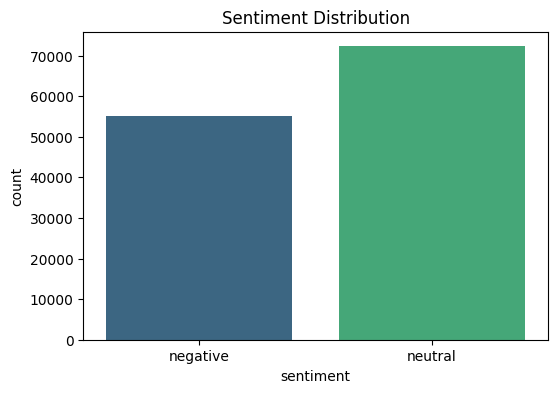

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


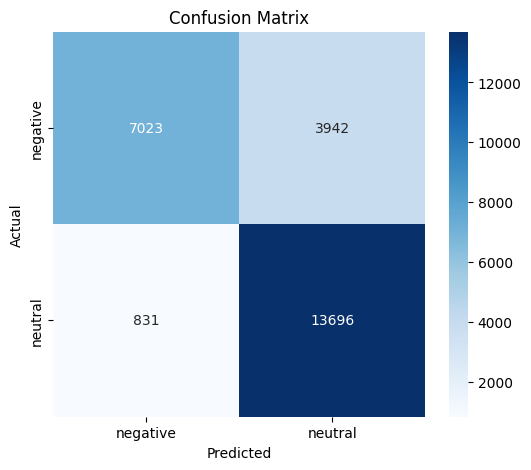

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral'], yticklabels=['negative', 'neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


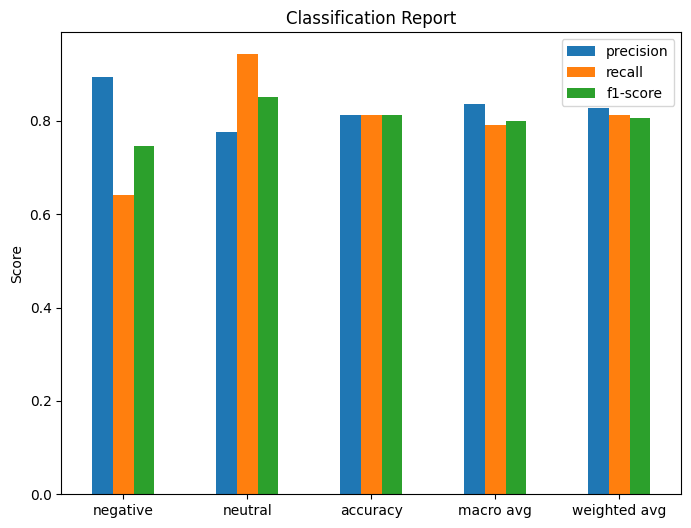

In [ ]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot
plt.figure(figsize=(8, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=plt.gca())
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


## Got Accuracy = 81%
# *Thank You*